<a href="https://colab.research.google.com/github/lakshyaaditi/ThreeB/blob/master/Finalyearproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
src_dir = "/content/gdrive/My Drive/Colab Notebooks/dataset/images"
train_val_dst_dir = "/content/gdrive/My Drive/Colab Notebooks/dataset/images/train" 
test_dst_dir = "/content/gdrive/My Drive/Colab Notebooks/dataset/images/test" 


import os
if not os.path.isdir(train_val_dst_dir):
    os.mkdir(train_val_dst_dir)
if not os.path.isdir(test_dst_dir):
    os.mkdir(test_dst_dir)


if len([f for f in os.listdir(test_dst_dir)]) == 0:
    all_images_names = os.listdir(src_dir)
    train_val_images = []
    test_images  = []
    for image in all_images_names:
        if "Train" in image:
            shutil.copy(src_dir+"/"+image,train_val_dst_dir)
        elif "Test" in image:
            shutil.copy(src_dir+"/"+image,test_dst_dir)
        else:
            print("error")

# Check for possible errors
total = len([f for f in  os.listdir(src_dir)])
train_val_total = len([f for f in  os.listdir(train_val_dst_dir)])
test_total = len([f for f in  os.listdir(test_dst_dir)])
print(total == train_val_total + test_total)

False


In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --user tf-nightly

# IMPORT

%matplotlib inline                 
  
import sys                    # Enabler of operating system dependent functionality
import os                     # Provides access to some variables & functions for the interpreter
import shutil                 # Provides high-level operations on files and collections of files
from shutil import copyfile   # Import module we'll need to import our custom module
import math                   # Provides access to basic mathematical functions
import time                   # Provides various time-related functions
import glob                   # Pathnames management
from PIL import Image as pil_image
import itertools
import pickle

import pandas as pd           # Methods to manipulate, filter, group, and transform data
import numpy as np            # Efficient storage and computation for multi-dimensional data arrays
from numpy import expand_dims

import matplotlib             # Interface for creation of publication-quality plots and figures
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import seaborn as sns         # Matplotlib-based statistical data visualization interface 
                              # Interactive plotting library 
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA, TruncatedSVD # Principal component analysis (PCA); dimensionality reduction using truncated SVD.

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, save_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import tensorflow.keras.layers as L
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam , RMSprop

from imblearn.over_sampling import SMOTE  #Class Balancing 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 510.1 MB 22 kB/s 
     |████████████████████████████████| 438 kB 60.9 MB/s 
     |████████████████████████████████| 1.7 MB 49.9 MB/s 
     |████████████████████████████████| 5.8 MB 34.9 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# Insight of the datasets

kaggle = True
if kaggle:
    outdir = "/content/gdrive/My Drive/Colab Notebooks/dataset/working/"
    indir = "/content/gdrive/My Drive/Colab Notebooks/dataset/images/"
else:
    outdir = "/content/gdrive/My Drive/Colab Notebooks/dataset/working/"
    indir = "/content/gdrive/My Drive/Colab Notebooks/dataset/images/"
    

test_dir = indir + "test"
train_labels_csv = pd.read_csv(indir+"train.csv")
print(train_labels_csv.head())
print("-------------------------------------")
example_submission_csv = pd.read_csv(indir+"sample_submission.csv")
print(example_submission_csv.head() )
print("-------------------------------------")
test_csv = pd.read_csv(indir+"test.csv")
test_paths_csv= pd.DataFrame(test_csv["image_id"].apply(lambda x: test_dir+"/"+x+".jpg"))
print(test_paths_csv.head() )

  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0
-------------------------------------
  image_id  healthy  multiple_diseases  rust  scab
0   Test_0     0.25               0.25  0.25  0.25
1   Test_1     0.25               0.25  0.25  0.25
2   Test_2     0.25               0.25  0.25  0.25
3   Test_3     0.25               0.25  0.25  0.25
4   Test_4     0.25               0.25  0.25  0.25
-------------------------------------
                                            image_id
0  /content/gdrive/My Drive/Colab Notebooks/datas...
1  /content/gdrive/My Drive/Colab Notebooks/datas...
2  /content/gdrive/My Drive/Colab Notebooks/datas...
3  /content/gdrive/My Drive/Colab Notebooks/datas...
4  /content/gdrive/My Drive/Colab Notebooks/dat

In [ ]:
# Create csv files with images
train_val_healthy_csv = train_labels_csv[train_labels_csv["healthy"] == 1]
train_val_multiple_diseases_csv  = train_labels_csv[train_labels_csv["multiple_diseases"] == 1]
train_val_rust_csv = train_labels_csv[train_labels_csv["rust"] == 1]
train_val_scab_csv = train_labels_csv[train_labels_csv["scab"] == 1]

two_classes = train_labels_csv[(train_labels_csv["scab"] == 1) & (train_labels_csv["multiple_diseases"] == 1)]

train_val_healthy_names = train_val_healthy_csv["image_id"].tolist()
train_val_multiple_diseases_names = train_val_multiple_diseases_csv["image_id"].tolist()
train_val_rust_names = train_val_rust_csv["image_id"].tolist()
train_val_scab_names = train_val_scab_csv["image_id"].tolist()
# print(train_val_healthy_names)

src_dir = "/content/gdrive/My Drive/Colab Notebooks/dataset/images"
train_dst_dir = outdir+"train_" 

train_dst_healthy_dir = outdir+"train_/healthy"
train_dst_multiple_diseases_dir =outdir+"train_/multiple_diseases"
train_dst_rust_dir = outdir+"train_/rust"
train_dst_scab_dir = outdir+"train_/scab"

test_dst_dir = outdir + "test_image/test"

# Create and fill the directories
try:

    for image in train_val_healthy_names :
            shutil.copy(src_dir+"/train/"+image+".jpg",train_dst_healthy_dir)
            
    for image in train_val_multiple_diseases_names :
            shutil.copy(src_dir+"/train/"+image+".jpg",train_dst_multiple_diseases_dir)

    for image in train_val_rust_names :
            shutil.copy(src_dir+"/train/"+image+".jpg",train_dst_rust_dir)

    for image in train_val_scab_names :
            shutil.copy(src_dir+"/train/"+image+".jpg",train_dst_scab_dir)

    for image in test_paths_csv["image_id"].tolist():
        shutil.copy(image,test_dst_dir)
        
except FileExistsError as err:
    print("folders already exist")
 
# Check for possible errors
total = len([f for f in  os.listdir(src_dir)])
train_healthy_total = len([f for f in  os.listdir(train_dst_healthy_dir)])
train_multiple_diseases_total = len([f for f in  os.listdir(train_dst_multiple_diseases_dir)])
train_rust_total = len([f for f in  os.listdir(train_dst_rust_dir)])
train_scab_total = len([f for f in  os.listdir(train_dst_scab_dir)])

total = train_healthy_total + train_multiple_diseases_total +train_rust_total+ train_scab_total 
train_size = math.ceil(total*0.8)
val_size = total - train_size
test_size = test_csv.size 
image_size  = (200,200)
batch_size = 32
seed = 100
print(train_healthy_total,train_multiple_diseases_total,train_rust_total,train_scab_total,)

526 91 622 599


In [ ]:
def create_augmented_data(train_dst_dir , train_generator, val_generator, aug, batch_size, valid = True):
    if valid:
    
        print("loading data...")
        train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dst_dir,
        validation_split=0.2,
        subset="training",
        seed=1337,
        image_size=image_size,
        batch_size=train_size, 
        )

        val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            train_dst_dir,
            validation_split=0.2,
            subset="validation",
            seed=1337,
            image_size=image_size,
            batch_size=val_size,
        )
        
        print("augmenting train...")
        res = list(zip(*train_ds.unbatch().as_numpy_iterator()))
        x_train = np.array(res[0])
        print("x done")
        y_train = np.array(res[1])
        yforpca = y_train
        print(x_train.shape,y_train.shape)
        unique, counts = numpy.unique(y_train, return_counts=True)
        print("class distribution before smote = ", counts)
        x_train  = np.array([image.flatten() for image in x_train ])
        xforpca = x_train
        print("flattened")

        smote_train = SMOTE(sampling_strategy = "all", random_state = 420,k_neighbors=10,n_jobs=4) # svmsmote goes out of memory in all configs
        x_train, y_train = smote_train.fit_resample(x_train, y_train)
        x_train = np.reshape(x_train,(-1,200,200,3))
        tot_train = len(x_train)
        print("total_train after smote = ", x_train.shape)
        yforpca1 = y_train #
        xforpca1 = x_train  #
        unique, counts = numpy.unique(y_train, return_counts=True)
        print("class distribution after smote = ", counts)
        y_train_cat = tf.keras.utils.to_categorical(
            y_train, num_classes=4, dtype='float32'
        )
        
        
        train_generator.fit(x_train, seed = seed)
        aug_train_images, aug_train_labels = train_generator.flow(x = x_train,y = y_train_cat,shuffle = False,batch_size = tot_train,seed = seed).next() 
        aug_train_images = np.array(aug_train_images)
        aug_train_labels = np.array(aug_train_labels)
        
        del x_train
        #del y_train
        del train_ds

        out_train_datagen = ImageDataGenerator()
        out_train_datagen.fit(aug_train_images)
        out_train_flow = out_train_datagen.flow(aug_train_images,aug_train_labels,batch_size = batch_size,shuffle = False)

        del aug_train_images
        del aug_train_labels

        print("train augmented, augmenting val...")
        #i = 0
        res = list(zip(*val_ds.unbatch().as_numpy_iterator()))
        x_val = np.array(res[0])
        y_val = np.array(res[1])
        y_val_cat = tf.keras.utils.to_categorical(
            y_val, num_classes=4, dtype='float32'
        )
        print(x_val.shape,y_val.shape,y_val_cat.shape)
        
        
        val_generator.fit(x_val)
        aug_val_images, aug_val_labels = val_generator.flow(x = x_val,y = y_val_cat,shuffle = False,batch_size = val_size,seed = seed).next()
        aug_val_images = np.array(aug_val_images)
        aug_val_labels = np.array(aug_val_labels)

        del x_val
        del val_ds

        out_val_datagen = ImageDataGenerator()
        out_val_datagen.fit(aug_val_images)
        out_val_flow = out_val_datagen.flow(aug_val_images,aug_val_labels,batch_size = val_size, shuffle = False)

        del aug_val_images
        del aug_val_labels
        del res

        print("returning")
        return (out_train_flow,out_val_flow,y_val,y_train,tot_train)
   
    else:
        print("loading data...")
        train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dst_dir,
        seed=1337,
        image_size=image_size,
        batch_size=train_size, 
        )
        
        print("augmenting train...")
        res = list(zip(*train_ds.unbatch().as_numpy_iterator()))
        x_train = np.array(res[0])
        y_train = np.array(res[1])
        print(x_train.shape,y_train.shape)
        unique, counts = numpy.unique(y_train, return_counts=True)
        print("class distribution before smote = ", counts)
        x_train  = np.array([image.flatten() for image in x_train ])
        print("flattened")
        yforpca = y_train 
        xforpca = x_train  
        smote_train = SMOTE(sampling_strategy = "all", random_state = 420,k_neighbors=10,n_jobs=4)
        x_train, y_train = smote_train.fit_resample(x_train, y_train)
        x_train = np.reshape(x_train,(-1,200,200,3))
        yforpca1 = y_train 
        xforpca1 = x_train 
        unique, counts = numpy.unique(y_train, return_counts=True)
        print("class distribution after smote = ", counts)
        tot_train = len(x_train)
        print("total_train after smote = ", x_train.shape)
        
        y_train_cat = tf.keras.utils.to_categorical(
            y_train, num_classes=4, dtype='float32'
        )   

        train_generator.fit(x_train,seed = seed)
        aug_train_images, aug_train_labels = train_generator.flow(x = x_train,y = y_train_cat,shuffle = False,batch_size = tot_train,seed = seed).next()
        aug_train_images = np.array(aug_train_images)
        aug_train_labels = np.array(aug_train_labels)

        del x_train
        del y_train
        del train_ds

        out_train_datagen = ImageDataGenerator()
        out_train_datagen.fit(aug_train_images)
        out_train_flow = out_train_datagen.flow(aug_train_images,aug_train_labels,batch_size = batch_size,shuffle = False)

        del aug_train_images
        del aug_train_labels
        
        return (out_train_flow,tot_train,xforpca,yforpca,xforpca1,yforpca1)

In [ ]:
def get_augmented_test(test_dir, test_generator):
    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        outdir + "test_image",
        labels="inferred",
        label_mode="int",
        class_names=None,
        color_mode="rgb",
        batch_size=test_size,
        image_size=image_size,
        shuffle = False,
        seed=None,
        validation_split=None,
        subset=None,
        interpolation="bilinear",
        follow_links=False,
    )
    
    x_test = np.array([ array for array, label in test_ds.unbatch().as_numpy_iterator()])
    test_generator.fit(x_test,seed = seed)
    test_flow = test_generator.flow(
        x= x_test,
        y=None,
        batch_size = test_size,
        shuffle=False,seed = seed)

    test_imgs = test_flow.next()

    del test_ds
    del x_test
    del test_generator

    return test_imgs

In [ ]:

# TRAIN
import numpy
train_datagen = ImageDataGenerator(rotation_range=360,                # DATA AUGMENTATION
                                   #shear_range=.25,                  # DATA AUGMENTATION
                                   #zoom_range=.25,                   # DATA AUGMENTATION
                                   #width_shift_range=.25,            # DATA AUGMENTATION
                                   #height_shift_range=.25,           # DATA AUGMENTATION
                                   rescale=1./255,                    # DATA MODIFICATION
                                   #brightness_range=[.5,1.5],        # DATA AUGMENTATION
                                   horizontal_flip=True,              # DATA AUGMENTATION
                                   #vertical_flip=True                # DATA AUGMENTATION
                                  )

# VALIDATION
val_datagen = ImageDataGenerator(rescale=1./255)

# TEST
test_datagen = ImageDataGenerator(rescale=1./255)

# To train and validate
train_flow_80, val_flow, y_val, y_train,total_train_80 = create_augmented_data(train_dst_dir  = train_dst_dir,train_generator = train_datagen, val_generator = val_datagen , aug = 5, batch_size = batch_size )
train_flow,total_train,x,y,xS,yS = create_augmented_data(train_dst_dir  = train_dst_dir,train_generator = train_datagen, val_generator = val_datagen , aug = 5, batch_size = 32, valid = False )

loading data...
Found 1838 files belonging to 4 classes.
Using 1471 files for training.
Found 1838 files belonging to 4 classes.
Using 367 files for validation.
augmenting train...
Found 1838 files belonging to 4 classes.
Using 367 files for validation.
augmenting train...
x done
(1471, 200, 200, 3) (1471,)
class distribution before smote =  [414  78 498 481]
x done
(1471, 200, 200, 3) (1471,)
class distribution before smote =  [414  78 498 481]
flattened
flattened
total_train after smote =  (1992, 200, 200, 3)
class distribution after smote =  [498 498 498 498]
total_train after smote =  (1992, 200, 200, 3)
class distribution after smote =  [498 498 498 498]
train augmented, augmenting val...
train augmented, augmenting val...
(367, 200, 200, 3) (367,) (367, 4)
(367, 200, 200, 3) (367,) (367, 4)
returning
loading data...
Found 1838 files belonging to 4 classes.
augmenting train...
returning
loading data...
Found 1838 files belonging to 4 classes.
augmenting train...
(1838, 200, 200, 3

In [ ]:
def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ["orange","blue","red","green"]
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            #plt.legend(handles=[orange_patch, blue_patch], prop={'size': 20})

x_train  = np.array([image.flatten() for image in x ])
x_trainS  = np.array([image.flatten() for image in xS ])

del x,xS

fig = plt.figure(figsize=(20,10))
fig.add_subplot(121)
plot_LSA(x_train, y)
plt.title("pre_SMOTE")
fig.add_subplot(122)
plot_LSA(x_trainS, yS)
plt.title("post_SMOTE")

In [ ]:
pca = PCA()
pca.fit(x_trainS)

U = pca.transform(x_trainS)
S = pca.explained_variance_
V = pca.components_

print ("U.shape = ", U.shape)
print ("S.shape = ",S.shape)
print ("V.shape = ", V.shape)

plt.rc("image", cmap="binary")
plt.figure(figsize=(8,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(x_train[i].reshape(200,200,3)))
    plt.title(y[i])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()


print("plot the first principal components")

plt.figure(figsize=(8,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(V[i].reshape(200,200,3)))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()


print("plot less relevant principal components")
plt.figure(figsize=(8,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(V[200+i].reshape(200,200,3)))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

In [ ]:
ev_cumsum = np.cumsum(pca.explained_variance_)/(pca.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print (ev_at90)

plt.plot(ev_cumsum)
plt.title("Explained Variance")
plt.xlabel("Components")
plt.xticks([0, ev_at90, 1000, 1500, 2000, 2500])
plt.yticks(list(plt.yticks()[0]) + [0.9])

In [ ]:
# Create a directory to save outputs 

args = {
    "save_weights_only":True,
    "monitor":'val_categorical_auc',
    "mode":'max',
    "save_best_only":True,
    "verbose":0  }

checkpoint_filepaths = ["/content/gdrive/My Drive/Colab Notebooks/dataset/working/Saved/drop0.hdf5","/content/gdrive/My Drive/Colab Notebooks/dataset/working/Saved/drop1.hdf5","/content/gdrive/My Drive/Colab Notebooks/dataset/working/Saved/drop2.hdf5","/content/gdrive/My Drive/Colab Notebooks/dataset/working/Saved/drop3.hdf5","/content/gdrive/My Drive/Colab Notebooks/dataset/working/Saved/drop4.hdf5"
                       ,"/content/gdrive/My Drive/Colab Notebooks/dataset/working/Saved/.hdf5","/content/gdrive/My Drive/Colab Notebooks/dataset/working/Saved/drop6.hdf5","/content/gdrive/My Drive/Colab Notebooks/dataset/working/Saved/drop7.hdf5","/content/gdrive/My Drive/Colab Notebooks/dataset/working/Saved/drop8.hdf5","/content/gdrive/My Drive/Colab Notebooks/dataset/working/Saved/drop9.hdf5"]

In [ ]:
#DenseNet
def get_deeper_model():
    #reg = .0005
    
    METRICS = [ 
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.AUC(name='categorical_auc',multi_label=True),
        ]
    
    model = tf.keras.Sequential([DenseNet121(input_shape=(200, 200, 3),
                                weights='imagenet',
                                include_top=False),
                                L.GlobalAveragePooling2D(),
                                L.Dense(4,activation='softmax')])
        
    model.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=METRICS)
    
    print(model.summary())
    return model

In [ ]:
#ResNet
def get_resnet_model():
    #reg = .0005
    
    METRICS = [ 
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.AUC(name='categorical_auc',multi_label=True),
        ]
    
    model = tf.keras.Sequential([ResNet50(input_shape=(200, 200, 3),
                                weights='imagenet',
                                include_top=False),
                                L.GlobalAveragePooling2D(),
                                L.Dense(4,activation='softmax')])
        
    model.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=METRICS)
    
    print(model.summary())
    return model

In [ ]:
#InceptionV3
def get_inception_model():
    #reg = .0005
    
    METRICS = [ 
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.AUC(name='categorical_auc',multi_label=True),
        ]
    
    model = tf.keras.Sequential([InceptionV3(input_shape=(200, 200, 3),
                                weights='imagenet',
                                include_top=False),
                                L.GlobalAveragePooling2D(),
                                L.Dense(4,activation='softmax')])
        
    model.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=METRICS)
    
    print(model.summary())
    return model

In [ ]:
deeper_model = get_deeper_model()
deeper_history = deeper_model.fit_generator(train_flow_80,
            steps_per_epoch = total_train_80 // batch_size, #train_size//batch_size
            epochs=10,             
            validation_data=val_flow,
            validation_steps=1,      
            workers=4)

29097984/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 6, 6, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 4100      
                                                                 
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
62/62 [==============================] - 66s 598ms/step - loss: 1.1262 - categorical_accuracy: 0.5577 - categorical_auc: 0.7915 - val_loss: 47.6909 - val_categorical_accuracy: 0.3052 - val_categorical_auc: 0.5000
Epoch 2/10
62/62 [==============================] - 20s 327ms/step - loss: 0.8410 - categorical_accuracy: 0.6730 - categorical_auc: 0.8731 - val_loss: 1.2911 - val_categorical_accuracy: 0.5014 - val_categorical_auc: 0.8559
Epoch 3/10
62/62 [==============================] - 20s 327ms/step - loss: 0.5171 - categorical_accuracy: 0.8270 - categorical_auc: 0.9496 - val_loss: 0.9226 - val_categorical_accuracy: 0.6757 - val_categorical_auc: 0.8796
Epoch 4/10
62/62 [==============================] - 20s 327ms/step - loss: 0.3980 - categorical_accuracy: 0.8786 - categorical_auc: 0.9682 - val_loss: 0.9610 - val_categorical_accuracy: 0.7548 - val_categorical_auc: 0.8802
Epoch 5/10
62/62 [==============================] - 20s 330ms/step - loss: 0.3337 - categorical_accuracy: 0

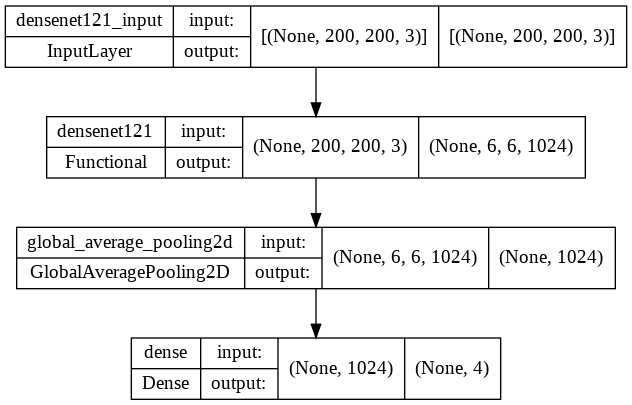

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(deeper_model, show_shapes=True, show_layer_names=True, to_file='deeper_model.png')
from IPython.display import Image
Image(retina=True, filename='deeper_model.png')

In [ ]:
resnet_model = get_resnet_model()
resnet_history = resnet_model.fit_generator(train_flow_80,
            steps_per_epoch = total_train_80 // batch_size, #train_size//batch_size
            epochs=10,               
            validation_data=val_flow,
            validation_steps=1,      
            workers=4)

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 23,542,788
Non-trainable params: 53,120
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
62/62 [==============================] - 39s 487ms/step - loss: 1.4143 - categorical_accuracy: 0.5010 - categorical_auc: 0.7160 - val_loss: 5747.5381 - val_categorical_accuracy: 0.3215 - val_categorical_auc: 0.5000
Epoch 2/10
62/62 [==============================] - 22s 353ms/step - loss: 0.8928 - categorical_accuracy: 0.6648 - categorical_auc: 0.8458 - val_loss: 1.4403 - val_categorical_accuracy: 0.3052 - val_categorical_auc: 0.5445
Epoch 3/10
62/62 [==============================] - 21s 340ms/step - loss: 0.6466 - categorical_accuracy: 0.7638 - categorical_auc: 0.9123 - val_loss: 1.6927 - val_categorical_accuracy: 0.3052 - val_categorical_auc: 0.5817
Epoch 4/10
62/62 [==============================] - 21s 341ms/step - loss: 0.5634 - categorical_accuracy: 0.7816 - categorical_auc: 0.9345 - val_loss: 2.5835 - val_categorical_accuracy: 0.3052 - val_categorical_auc: 0.6005
Epoch 5/10
62/62 [==============================] - 22s 348ms/step - loss: 0.4103 - categorical_accuracy:

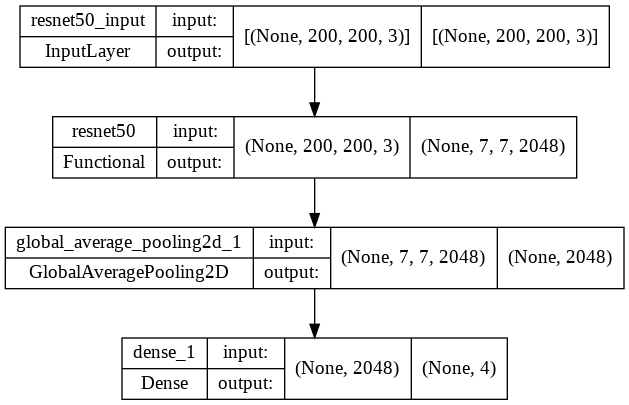

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(resnet_model, show_shapes=True, show_layer_names=True, to_file='resnet_model.png')
from IPython.display import Image
Image(retina=True, filename='resnet_model.png')

In [ ]:
inception_model = get_inception_model()
inception_history = inception_model.fit_generator(train_flow_80,
            steps_per_epoch = total_train_80 // batch_size, #train_size//batch_size
            epochs=10,              
            validation_data=val_flow,
            validation_steps=1, 
            workers=4)

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 21,776,548
Non-trainable params: 34,432
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


62/62 [==============================] - 37s 432ms/step - loss: 1.1534 - categorical_accuracy: 0.5633 - categorical_auc: 0.7764 - val_loss: 8515.9863 - val_categorical_accuracy: 0.3052 - val_categorical_auc: 0.5000
Epoch 2/10
62/62 [==============================] - 14s 220ms/step - loss: 0.6962 - categorical_accuracy: 0.7286 - categorical_auc: 0.8999 - val_loss: 1.7720 - val_categorical_accuracy: 0.1662 - val_categorical_auc: 0.6331
Epoch 3/10
62/62 [==============================] - 13s 217ms/step - loss: 0.6828 - categorical_accuracy: 0.7327 - categorical_auc: 0.8974 - val_loss: 5.4509 - val_categorical_accuracy: 0.0627 - val_categorical_auc: 0.5489
Epoch 4/10
62/62 [==============================] - 13s 215ms/step - loss: 0.5550 - categorical_accuracy: 0.7791 - categorical_auc: 0.9406 - val_loss: 1.8610 - val_categorical_accuracy: 0.0654 - val_categorical_auc: 0.6138
Epoch 5/10
62/62 [==============================] - 13s 214ms/step - loss: 0.5642 - categorical_accuracy: 0.8189 - c

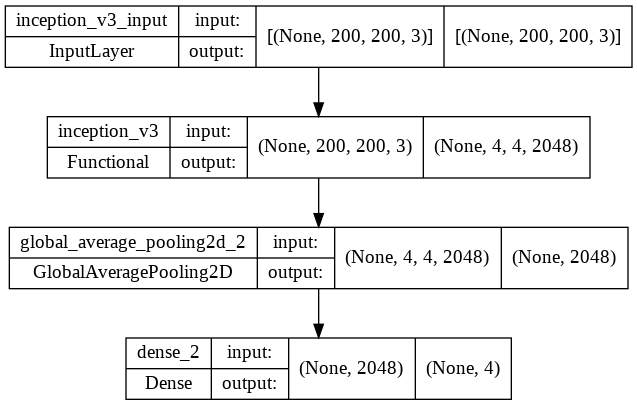

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(inception_model, show_shapes=True, show_layer_names=True, to_file='inception_model.png')
from IPython.display import Image
Image(retina=True, filename='inception_model.png')

In [ ]:
def plot_train_history(deeper_history):
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=deeper_history.history['categorical_accuracy'], marker=dict(color="blue"),
                name="Train acc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=deeper_history.history['val_categorical_accuracy'], marker=dict(color="green"),
                name="Val acc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=deeper_history.history['categorical_auc'], marker=dict(color="orange"),
                name="Train auc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=deeper_history.history['val_categorical_auc'], marker=dict(color="red"),
                name="Val auc"))

    fig.update_layout(title_text="", yaxis_title= "Metrics", xaxis_title="Epochs")
    fig.show()

In [ ]:
def plot_train_history(resnet_history):
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=resnet_history.history['categorical_accuracy'], marker=dict(color="blue"),
                name="Train acc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=resnet_history.history['val_categorical_accuracy'], marker=dict(color="green"),
                name="Val acc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=resnet_history.history['categorical_auc'], marker=dict(color="orange"),
                name="Train auc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=resnet_history.history['val_categorical_auc'], marker=dict(color="red"),
                name="Val auc"))

    fig.update_layout(title_text="", yaxis_title= "Metrics", xaxis_title="Epochs")
    fig.show()

In [ ]:
def plot_train_history(inception_history):
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=inception_history.history['categorical_accuracy'], marker=dict(color="blue"),
                name="Train acc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=inception_history.history['val_categorical_accuracy'], marker=dict(color="green"),
                name="Val acc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=inception_history.history['categorical_auc'], marker=dict(color="orange"),
                name="Train auc"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=inception_history.history['val_categorical_auc'], marker=dict(color="red"),
                name="Val auc"))

    fig.update_layout(title_text="", yaxis_title= "Metrics", xaxis_title="Epochs")
    fig.show()

In [ ]:
plot_train_history(deeper_history)

In [ ]:
plot_train_history(resnet_history)

In [ ]:
plot_train_history(inception_history)

In [ ]:
def plot_graphs(deeper_history,inception_history,resnet_history):
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=deeper_history.history['categorical_accuracy'], marker=dict(color="dodgerblue"),
                name="DenseNet Train acc"))
    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=inception_history.history['categorical_accuracy'], marker=dict(color="orange"),
                name="InceptionV3 Train acc"))
    
    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=resnet_history.history['categorical_accuracy'], marker=dict(color="green"),
                name="Resnet Train acc"))
    fig.update_layout(title_text="", yaxis_title= "Metrics", xaxis_title="Epochs", template="plotly_white")
    fig.show()
    
plot_graphs(deeper_history,inception_history,resnet_history)

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



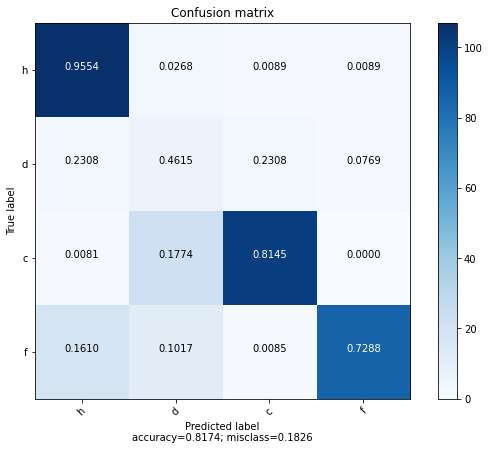

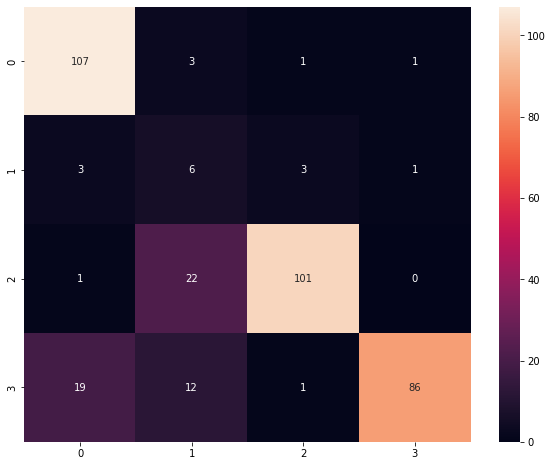

In [ ]:
Y_pred = deeper_model.predict_generator(val_flow, train_size // batch_size +1) #128 +1
y_pred = np.argmax(Y_pred, axis=1)
a = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(a,["h","d","c","f"],normalize=True)

plt.figure(figsize=(10,8))
sns.heatmap(a, annot=True, fmt="d");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



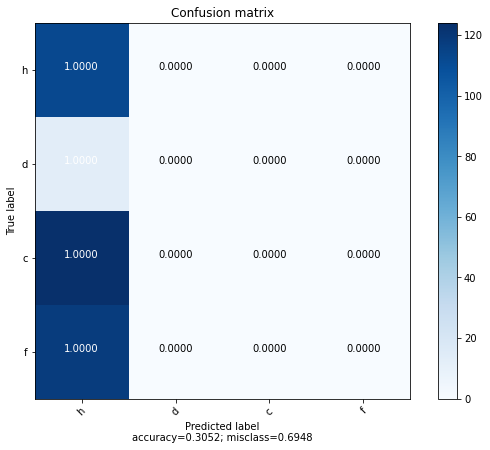

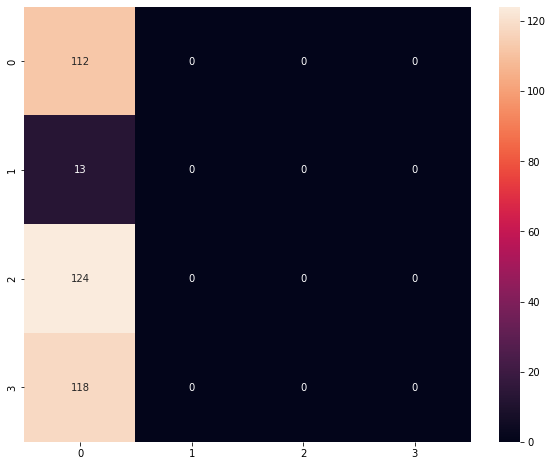

In [ ]:
Y_pred = resnet_model.predict_generator(val_flow, train_size // batch_size +1) #128 +1
y_pred = np.argmax(Y_pred, axis=1)
a = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(a,["h","d","c","f"],normalize=True)

plt.figure(figsize=(10,8))
sns.heatmap(a, annot=True, fmt="d");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



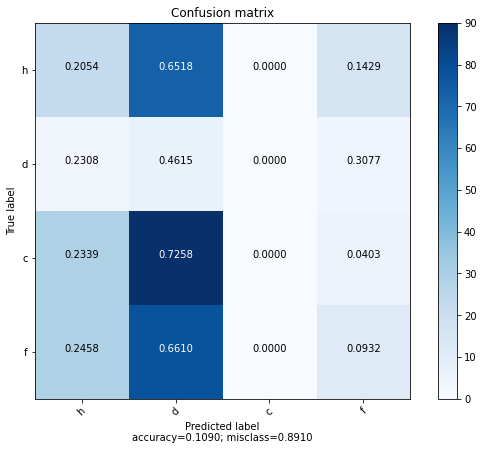

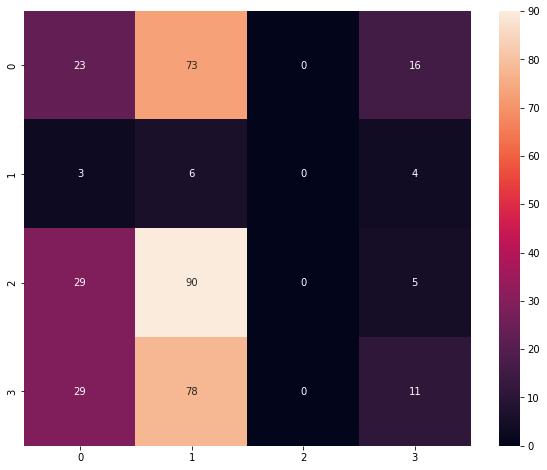

In [ ]:
Y_pred = inception_model.predict_generator(val_flow, train_size // batch_size +1) #128 +1
y_pred = np.argmax(Y_pred, axis=1)
a = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(a,["h","d","c","f"],normalize=True)

plt.figure(figsize=(10,8))
sns.heatmap(a, annot=True, fmt="d");

In [ ]:
# Save memory
del y,yS
del train_flow_80, y_train, val_flow, y_val

# Load test
test_imgs = get_augmented_test(test_dir = test_dir, test_generator = test_datagen)
print(test_imgs.shape)

#os.listdir("../working")

Found 1831 files belonging to 1 classes.
(1821, 200, 200, 3)


In [ ]:
Dense = get_deeper_model()
model1=Dense.fit_generator(train_flow,
            steps_per_epoch = total_train // batch_size, #train_size//batch_size
            epochs=10,
            #callbacks=[lr_scheduled],
            workers=4)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 6, 6, 1024)        7037504   
                                                                 
 global_average_pooling2d_3   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



77/77 [==============================] - 39s 361ms/step - loss: 1.0425 - categorical_accuracy: 0.5965 - categorical_auc: 0.8198
Epoch 2/10
77/77 [==============================] - 24s 312ms/step - loss: 0.7096 - categorical_accuracy: 0.7382 - categorical_auc: 0.8979
Epoch 3/10
77/77 [==============================] - 24s 306ms/step - loss: 0.6158 - categorical_accuracy: 0.7797 - categorical_auc: 0.9260
Epoch 4/10
77/77 [==============================] - 24s 308ms/step - loss: 0.4769 - categorical_accuracy: 0.8522 - categorical_auc: 0.9563
Epoch 5/10
77/77 [==============================] - 24s 311ms/step - loss: 0.5063 - categorical_accuracy: 0.8318 - categorical_auc: 0.9475
Epoch 6/10
77/77 [==============================] - 24s 310ms/step - loss: 0.3142 - categorical_accuracy: 0.9178 - categorical_auc: 0.9803
Epoch 7/10
77/77 [==============================] - 24s 309ms/step - loss: 0.2022 - categorical_accuracy: 0.9475 - categorical_auc: 0.9913
Epoch 8/10
77/77 [====================

In [ ]:
y_predicted = Dense.predict(test_imgs)
df1 = pd.DataFrame(y_predicted, columns = ["healthy", "multiple_diseases", "rust","scab"],)
df1.insert(0,"image_id",test_csv["image_id"].tolist())
df1.to_csv("/content/gdrive/My Drive/Colab Notebooks/dataset/working/deeper_submission.csv", index = False)
df1

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.001615,0.027501,9.708834e-01,8.217797e-07
1,Test_1,0.000622,0.012931,9.864472e-01,2.717478e-07
2,Test_2,0.000012,0.002632,9.973553e-01,1.754786e-11
3,Test_3,0.000386,0.001877,5.134944e-11,9.977372e-01
4,Test_4,0.071114,0.397444,5.306227e-01,8.192187e-04
...,...,...,...,...,...
1816,Test_1816,0.004048,0.007266,1.053897e-07,9.886858e-01
1817,Test_1817,0.051789,0.840168,9.380921e-02,1.423405e-02
1818,Test_1818,0.987866,0.012134,3.923780e-09,7.294248e-07
1819,Test_1819,0.998163,0.001837,8.097537e-08,3.129653e-08


In [ ]:
for index,row in df1.iterrows():
  if(row["healthy"]>row["multiple_diseases"] and row["healthy"]>row["rust"] and row["healthy"] > row["scab"]):
    print(row["image_id"] + "-> Healthy")
  elif(row["multiple_diseases"]>row["rust"] and row["multiple_diseases"]>row["scab"]):
    print(row["image_id"] + "-> Diseased- Multiple Diseases")
  elif(row["multiple_diseases"]<row["rust"] and row["rust"]>row["scab"]):
    print(row["image_id"] + "-> Diseased- Rust Disease")
  else:
    print(row["image_id"] + "-> Diseased- Scab Disease")

Test_0-> Diseased- Rust Disease
Test_1-> Diseased- Rust Disease
Test_2-> Diseased- Rust Disease
Test_3-> Diseased- Scab Disease
Test_4-> Diseased- Rust Disease
Test_5-> Diseased- Scab Disease
Test_6-> Diseased- Rust Disease
Test_7-> Diseased- Scab Disease
Test_8-> Diseased- Scab Disease
Test_9-> Healthy
Test_10-> Diseased- Rust Disease
Test_11-> Diseased- Scab Disease
Test_12-> Healthy
Test_13-> Diseased- Rust Disease
Test_14-> Healthy
Test_15-> Diseased- Rust Disease
Test_16-> Diseased- Rust Disease
Test_17-> Diseased- Scab Disease
Test_18-> Diseased- Rust Disease
Test_19-> Diseased- Rust Disease
Test_20-> Healthy
Test_21-> Diseased- Multiple Diseases
Test_22-> Diseased- Rust Disease
Test_23-> Diseased- Scab Disease
Test_24-> Diseased- Rust Disease
Test_25-> Diseased- Scab Disease
Test_26-> Diseased- Rust Disease
Test_27-> Diseased- Rust Disease
Test_28-> Diseased- Rust Disease
Test_29-> Healthy
Test_30-> Healthy
Test_31-> Diseased- Scab Disease
Test_32-> Healthy
Test_33-> Diseased- S

In [ ]:
Dense = get_resnet_model()
model2=Dense.fit_generator(train_flow,
            steps_per_epoch = total_train // batch_size, #train_size//batch_size
            epochs=10,
            #callbacks=[lr_scheduled],
            workers=4)



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 23,542,788
Non-trainable params: 53,120
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



77/77 [==============================] - 34s 362ms/step - loss: 1.3959 - categorical_accuracy: 0.5240 - categorical_auc: 0.7476
Epoch 2/10
77/77 [==============================] - 25s 323ms/step - loss: 0.8686 - categorical_accuracy: 0.6710 - categorical_auc: 0.8523
Epoch 3/10
77/77 [==============================] - 25s 320ms/step - loss: 0.6663 - categorical_accuracy: 0.7504 - categorical_auc: 0.9115
Epoch 4/10
77/77 [==============================] - 25s 327ms/step - loss: 0.5102 - categorical_accuracy: 0.8322 - categorical_auc: 0.9486
Epoch 5/10
77/77 [==============================] - 25s 329ms/step - loss: 0.2913 - categorical_accuracy: 0.9186 - categorical_auc: 0.9843
Epoch 6/10
77/77 [==============================] - 25s 325ms/step - loss: 0.2802 - categorical_accuracy: 0.9088 - categorical_auc: 0.9827
Epoch 7/10
77/77 [==============================] - 25s 325ms/step - loss: 0.1501 - categorical_accuracy: 0.9515 - categorical_auc: 0.9949
Epoch 8/10
77/77 [====================

In [ ]:
y_predicted = Dense.predict(test_imgs)
df2 = pd.DataFrame(y_predicted, columns = ["healthy", "multiple_diseases", "rust","scab"],)
df2.insert(0,"image_id",test_csv["image_id"].tolist())
df2.to_csv("/content/gdrive/My Drive/Colab Notebooks/dataset/working/resnet_submission.csv", index = False)
df2

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.994306,0.002309,0.000841,0.002545
1,Test_1,0.995237,0.001849,0.000331,0.002582
2,Test_2,0.990634,0.002784,0.000821,0.005761
3,Test_3,0.985236,0.004213,0.001594,0.008957
4,Test_4,0.989774,0.003138,0.000962,0.006126
...,...,...,...,...,...
1816,Test_1816,0.946232,0.005717,0.010482,0.037569
1817,Test_1817,0.974111,0.006507,0.003048,0.016334
1818,Test_1818,0.998703,0.000593,0.000057,0.000646
1819,Test_1819,0.998712,0.000586,0.000053,0.000649


In [ ]:
for index,row in df2.iterrows():
  if(row["healthy"]>row["multiple_diseases"] and row["healthy"]>row["rust"] and row["healthy"] > row["scab"]):
    print(row["image_id"] + "-> Healthy")
  elif(row["multiple_diseases"]>row["rust"] and row["multiple_diseases"]>row["scab"]):
    print(row["image_id"] + "-> Diseased- Multiple Diseases")
  elif(row["multiple_diseases"]<row["rust"] and row["rust"]>row["scab"]):
    print(row["image_id"] + "-> Diseased- Rust Disease")
  else:
    print(row["image_id"] + "-> Diseased- Scab Disease")

Test_0-> Healthy
Test_1-> Healthy
Test_2-> Healthy
Test_3-> Healthy
Test_4-> Healthy
Test_5-> Healthy
Test_6-> Healthy
Test_7-> Healthy
Test_8-> Healthy
Test_9-> Healthy
Test_10-> Diseased- Scab Disease
Test_11-> Healthy
Test_12-> Healthy
Test_13-> Healthy
Test_14-> Healthy
Test_15-> Healthy
Test_16-> Diseased- Rust Disease
Test_17-> Healthy
Test_18-> Healthy
Test_19-> Healthy
Test_20-> Healthy
Test_21-> Healthy
Test_22-> Healthy
Test_23-> Healthy
Test_24-> Healthy
Test_25-> Healthy
Test_26-> Healthy
Test_27-> Healthy
Test_28-> Healthy
Test_29-> Healthy
Test_30-> Healthy
Test_31-> Healthy
Test_32-> Healthy
Test_33-> Healthy
Test_34-> Healthy
Test_35-> Healthy
Test_36-> Healthy
Test_37-> Healthy
Test_38-> Healthy
Test_39-> Healthy
Test_40-> Healthy
Test_41-> Healthy
Test_42-> Healthy
Test_43-> Healthy
Test_44-> Healthy
Test_45-> Healthy
Test_46-> Healthy
Test_47-> Healthy
Test_48-> Healthy
Test_49-> Healthy
Test_50-> Healthy
Test_51-> Healthy
Test_52-> Healthy
Test_53-> Healthy
Test_54-

In [ ]:
Dense = get_inception_model()
model3=Dense.fit_generator(train_flow,
            steps_per_epoch = total_train // batch_size, #train_size//batch_size
            epochs=10,
            #callbacks=[lr_scheduled],
            workers=4)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 21,776,548
Non-trainable params: 34,432
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



77/77 [==============================] - 23s 202ms/step - loss: 1.0519 - categorical_accuracy: 0.5749 - categorical_auc: 0.7946
Epoch 2/10
77/77 [==============================] - 16s 208ms/step - loss: 0.6797 - categorical_accuracy: 0.7337 - categorical_auc: 0.8998
Epoch 3/10
77/77 [==============================] - 16s 207ms/step - loss: 0.5865 - categorical_accuracy: 0.7940 - categorical_auc: 0.9286
Epoch 4/10
77/77 [==============================] - 16s 202ms/step - loss: 0.4397 - categorical_accuracy: 0.8546 - categorical_auc: 0.9604
Epoch 5/10
77/77 [==============================] - 16s 201ms/step - loss: 0.4501 - categorical_accuracy: 0.8526 - categorical_auc: 0.9594
Epoch 6/10
77/77 [==============================] - 16s 201ms/step - loss: 0.2712 - categorical_accuracy: 0.9222 - categorical_auc: 0.9855
Epoch 7/10
77/77 [==============================] - 16s 205ms/step - loss: 0.1701 - categorical_accuracy: 0.9572 - categorical_auc: 0.9932
Epoch 8/10
77/77 [====================

In [ ]:
y_predicted = Dense.predict(test_imgs)
df3 = pd.DataFrame(y_predicted, columns = ["healthy", "multiple_diseases", "rust","scab"],)
df3.insert(0,"image_id",test_csv["image_id"].tolist())
df3.to_csv("/content/gdrive/My Drive/Colab Notebooks/dataset/working/inception_submission.csv", index = False)
df3

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.001123,0.001962,9.969147e-01,0.000001
1,Test_1,0.097988,0.174668,7.259080e-01,0.001436
2,Test_2,0.000823,0.003571,9.956042e-01,0.000001
3,Test_3,0.003884,0.108362,5.044655e-06,0.887749
4,Test_4,0.676506,0.161168,1.572386e-01,0.005088
...,...,...,...,...,...
1816,Test_1816,0.000338,0.033946,6.689371e-08,0.965716
1817,Test_1817,0.000149,0.253098,7.126017e-09,0.746753
1818,Test_1818,0.828409,0.169351,4.142404e-05,0.002199
1819,Test_1819,0.941407,0.056170,3.656197e-05,0.002386


In [ ]:
for index,row in df3.iterrows():
  if(row["healthy"]>row["multiple_diseases"] and row["healthy"]>row["rust"] and row["healthy"] > row["scab"]):
    print(row["image_id"] + "-> Healthy")
  elif(row["multiple_diseases"]>row["rust"] and row["multiple_diseases"]>row["scab"]):
    print(row["image_id"] + "-> Diseased- Multiple Diseases")
  elif(row["multiple_diseases"]<row["rust"] and row["rust"]>row["scab"]):
    print(row["image_id"] + "-> Diseased- Rust Disease")
  else:
    print(row["image_id"] + "-> Diseased- Scab Disease")

Test_0-> Diseased- Rust Disease
Test_1-> Diseased- Rust Disease
Test_2-> Diseased- Rust Disease
Test_3-> Diseased- Scab Disease
Test_4-> Healthy
Test_5-> Diseased- Scab Disease
Test_6-> Diseased- Rust Disease
Test_7-> Diseased- Scab Disease
Test_8-> Diseased- Scab Disease
Test_9-> Healthy
Test_10-> Healthy
Test_11-> Diseased- Scab Disease
Test_12-> Healthy
Test_13-> Diseased- Rust Disease
Test_14-> Diseased- Scab Disease
Test_15-> Diseased- Rust Disease
Test_16-> Diseased- Rust Disease
Test_17-> Diseased- Scab Disease
Test_18-> Diseased- Rust Disease
Test_19-> Diseased- Rust Disease
Test_20-> Healthy
Test_21-> Diseased- Rust Disease
Test_22-> Diseased- Rust Disease
Test_23-> Diseased- Multiple Diseases
Test_24-> Diseased- Rust Disease
Test_25-> Diseased- Scab Disease
Test_26-> Healthy
Test_27-> Diseased- Rust Disease
Test_28-> Diseased- Rust Disease
Test_29-> Healthy
Test_30-> Healthy
Test_31-> Diseased- Scab Disease
Test_32-> Healthy
Test_33-> Diseased- Scab Disease
Test_34-> Healthy


In [ ]:
def plot_graphs(model1,model2,model3):
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=model1.history['categorical_accuracy'], marker=dict(color="dodgerblue"),
                name="DenseNet Test acc"))
    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=model2.history['categorical_accuracy'], marker=dict(color="orange"),
                name="Resnet Test acc"))
    
    fig.add_trace(
        go.Scatter(x=np.arange(1, 100+1), mode='lines+markers', y=model3.history['categorical_accuracy'], marker=dict(color="green"),
                name="InceptionV3 Test acc"))
    fig.update_layout(title_text="", yaxis_title= "Metrics", xaxis_title="Epochs", template="plotly_white")
    fig.show()
    
plot_graphs(model1,model2,model3)